In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df=pd.read_csv('D:\\python\\Titanic_ML\\box_office\\box_office_predictions.csv')

In [3]:
df.sample(5)

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
5330,0.0,USA,Marcos Siega,Comedy,237958.0,Chaos Theory (2008),PG-13,87,6.7,Ryan Reynolds,Castle Rock Entertainment,29198
3640,20000000.0,USA,J.C. Chandor,Crime,5740310.0,A Most Violent Year (2014),R,125,7.0,Oscar Isaac,Before The Door Pictures,52858
944,85000000.0,USA,Justin Lin,Action,62514415.0,The Fast and the Furious: Tokyo Drift (2006),PG-13,104,6.0,Lucas Black,Universal Pictures,199603
2997,36000000.0,USA,Andrew Niccol,Drama,12339633.0,Gattaca (1997),PG-13,106,7.8,Ethan Hawke,Columbia Pictures Corporation,239417
4483,1000000.0,USA,Rod Amateau,Adventure,1576615.0,The Garbage Pail Kids Movie (1987),PG,100,2.7,Anthony Newley,Atlantic Entertainment Group,6370


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
budget      6000 non-null float64
country     6000 non-null object
director    6000 non-null object
genre       6000 non-null object
gross       6000 non-null float64
name        6000 non-null object
rating      6000 non-null object
runtime     6000 non-null int64
score       6000 non-null float64
star        6000 non-null object
studio      6000 non-null object
votes       6000 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 562.6+ KB


In [5]:
df.describe()

,budget,gross,runtime,score,votes
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03
mean,2.469918e+07,3.341635e+07,106.587000,6.386383,7.188537e+04
std,3.721710e+07,5.735205e+07,18.026885,0.994921,1.308033e+05
min,0.000000e+00,4.410000e+02,50.000000,1.500000,2.700000e+01
25%,0.000000e+00,1.527796e+06,95.000000,5.800000,7.791750e+03
50%,1.100000e+07,1.229897e+07,102.000000,6.500000,2.660150e+04
75%,3.262500e+07,4.007256e+07,115.000000,7.100000,7.677475e+04
max,3.000000e+08,7.605076e+08,366.000000,9.300000,1.868308e+06


In [10]:
df['score'].value_counts(ascending=False)

6.7    269
6.5    252
6.3    250
6.4    244
6.6    243
6.2    237
6.8    236
6.1    230
7.2    220
7.1    211
5.9    207
7.0    206
7.3    203
6.9    198
5.7    196
5.8    192
6.0    182
7.4    160
7.6    159
5.6    152
7.5    143
5.5    137
5.3    129
7.7    119
5.4    116
7.8    116
5.1     83
5.2     76
5.0     71
7.9     68
      ... 
4.0     13
8.5     12
3.8     11
8.4     11
3.7     10
3.6     10
3.5     10
8.6      8
3.4      7
2.4      5
3.3      5
2.8      4
8.8      4
8.7      4
2.3      3
2.6      3
2.2      3
2.9      3
3.2      3
8.9      2
2.7      2
3.1      2
1.9      2
3.0      1
1.5      1
2.5      1
9.3      1
1.6      1
2.1      1
9.0      1
Name: score, Length: 74, dtype: int64

In [11]:
df['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
B15                 1
TV-PG               1
TV-14               1
TV-MA               1
B                   1
Name: rating, dtype: int64

In [13]:
df.loc[df['score']<6.7 , 'score']=0
df.loc[df['score']>6.7, 'score']=1
df.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,1.0,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,1.0,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,1.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,1.0,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,1.0,Christian Bale,Warner Bros.,1845853


In [17]:
df[['score', 'rating']].groupby(['rating'], as_index=False).mean().sort_values(by='rating', ascending=False)

,rating,score
12,UNRATED,0.667241
11,TV-PG,0.000000
10,TV-MA,1.000000
9,TV-14,1.000000
8,R,0.708973
7,PG-13,0.638620
6,PG,0.576319
5,Not specified,0.989286
4,NOT RATED,0.990728
3,NC-17,0.500000


In [18]:
df[['genre', 'score']].groupby(['genre'], as_index=False).mean().sort_values(by='genre', ascending=False)

,genre,score
16,Western,0.500000
15,War,0.500000
14,Thriller,0.058824
13,Sci-Fi,0.230769
12,Romance,0.357143
11,Mystery,0.944118
10,Musical,0.500000
9,Horror,0.335802
8,Fantasy,0.621429
7,Family,0.166667


In [19]:
df[['director', 'score']].groupby(['director'], as_index=False).mean().sort_values(by='director', ascending=False)

,director,score
2548,Éva Gárdos,1.000000
2547,Étienne Chatiliez,1.000000
2546,Éric Rohmer,1.000000
2545,Élie Chouraqui,0.000000
2544,Åke Sandgren,0.000000
2543,Álex de la Iglesia,0.333333
2542,Zoya Akhtar,1.000000
2541,Zoran Perisic,0.000000
2540,Zoe Clarke-Williams,0.000000
2539,Ziad Doueiri,1.000000


In [31]:
df.head(5)


,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,1.0,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,1.0,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,1.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,1.0,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,1.0,Christian Bale,Warner Bros.,1845853


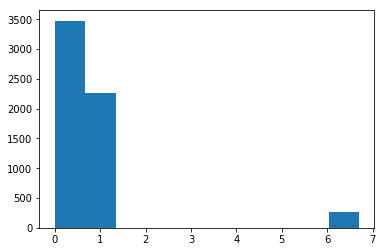

In [34]:
plt.hist(df.score)
plt.show()

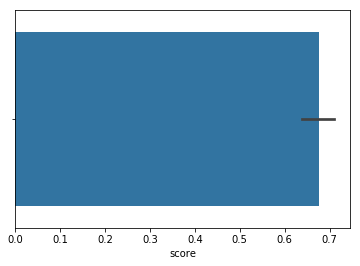

In [37]:
sns.barplot(df.score, data=df)

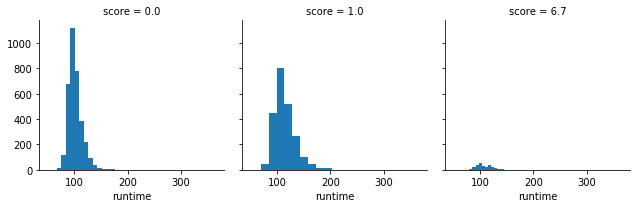

In [43]:
y=sns.FacetGrid(df, col='score')
y.map(plt.hist, 'runtime', bins=20)

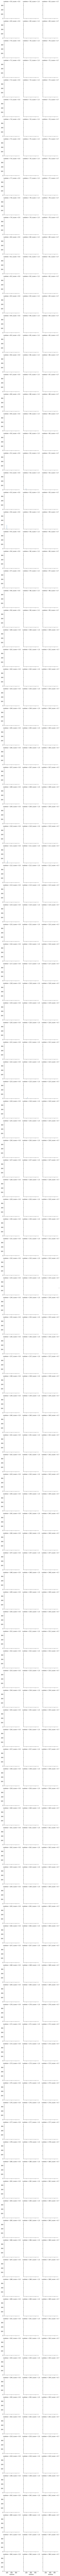

In [47]:
grid=sns.FacetGrid(df, col='score', row='runtime', size=2.2)
grid.map(plt.hist, 'runtime')
grid.add_legend()

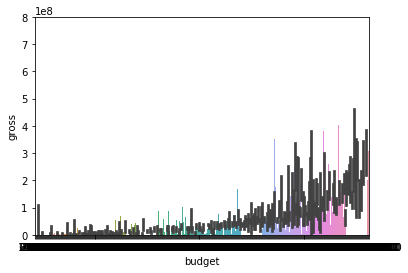

In [52]:
f=sns.barplot(df.budget, df.gross, data=df)
#f.figure(figsize=(10,6))

In [53]:
df.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,1.0,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,1.0,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,1.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,1.0,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,1.0,Christian Bale,Warner Bros.,1845853


In [54]:
df['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
New Zealand                         17
Sweden                              17
Belgium                             15
Mexico                              13
Netherlands                         12
Argentina                           10
Iran                                10
Russia                              10
Norway                               8
Czech Republic                       8
Taiwan                   

In [55]:
df.columns

Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')

In [56]:
df['director'].value_counts()

Woody Allen                   29
Steven Spielberg              20
Clint Eastwood                20
Ron Howard                    19
Steven Soderbergh             18
Ridley Scott                  17
Oliver Stone                  17
Richard Linklater             17
Joel Schumacher               16
Spike Lee                     16
Barry Levinson                16
Renny Harlin                  14
Garry Marshall                14
Chris Columbus                13
Rob Reiner                    13
Gus Van Sant                  13
Robert Zemeckis               13
Dennis Dugan                  13
Stephen Frears                13
Tim Burton                    13
Martin Scorsese               12
Bruce Beresford               12
Wes Craven                    12
Neil Jordan                   12
Pedro Almodóvar               12
Tony Scott                    12
Kenneth Branagh               12
Ang Lee                       12
Ivan Reitman                  12
Edward Zwick                  12
          

In [61]:
df.columns

Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')

In [74]:
df.dtypes

budget      float64
country      object
director     object
genre        object
gross       float64
name         object
rating       object
runtime       int64
score       float64
star         object
studio       object
votes         int64
dtype: object

In [82]:
train_test_data=[df]


In [79]:
df['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
Western         2
War             2
Name: genre, dtype: int64

In [83]:
genre_mapping={"Comedy":0,"Drama":0.5,"Action":1,"Crime":1.5,"Adventure":2,"Biography":2.5,"Animation":3,
              "Horror":3.5,"Mystery":4,"Fantasy":5,"Thriller":5.5,"Romance":6,"Sci-Fi":6.5,"Family":7,"Musical":7.5,
              "Western":8,"War":8.5}
for dataset in train_test_data:
    dataset['genre']=dataset['genre'].map(genre_mapping)

In [84]:
df.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,1.0,760507625.0,Avatar (2009),PG-13,162,1.0,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,0.5,658672302.0,Titanic (1997),PG-13,194,1.0,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,1.0,652270625.0,Jurassic World (2015),PG-13,124,1.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,1.0,623357910.0,The Avengers (2012),PG-13,143,1.0,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,1.0,534858444.0,The Dark Knight (2008),PG-13,152,1.0,Christian Bale,Warner Bros.,1845853


In [87]:
df.dtypes

budget      float64
country      object
director     object
genre       float64
gross       float64
name         object
rating       object
runtime       int64
score       float64
star         object
studio       object
votes         int64
dtype: object

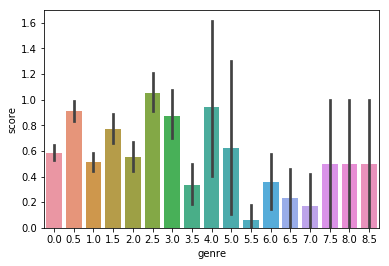

In [90]:
y=sns.barplot(df.genre, df.score, data=df)


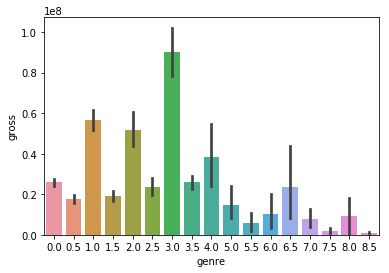

In [91]:
sns.barplot(df.genre, df.gross, data=df)

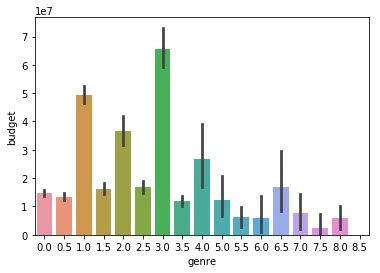

In [92]:
sns.barplot(df.genre, df.budget, data=df)


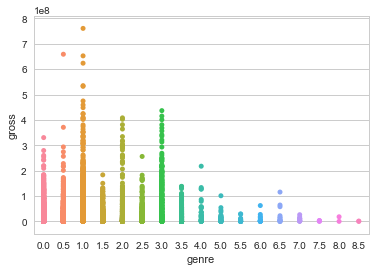

In [95]:
sns.stripplot(df.genre, df.gross, data=df)

In [96]:
df.dtypes

budget      float64
country      object
director     object
genre       float64
gross       float64
name         object
rating       object
runtime       int64
score       float64
star         object
studio       object
votes         int64
dtype: object

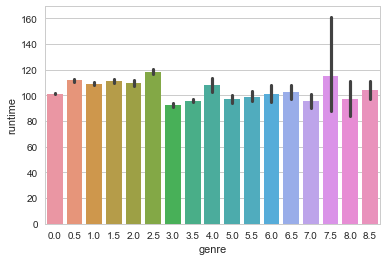

In [100]:
sns.barplot(df.genre, df.runtime, data=df)

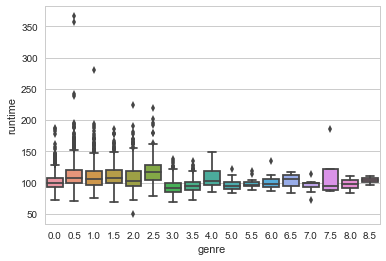

In [99]:
sns.boxplot(df.genre, df.runtime, data=df)

In [101]:
df['studio'].value_counts()

Universal Pictures                          269
Warner Bros.                                265
Paramount Pictures                          229
Twentieth Century Fox Film Corporation      176
New Line Cinema                             146
Columbia Pictures Corporation               143
Touchstone Pictures                         112
Columbia Pictures                            96
Walt Disney Pictures                         94
Metro-Goldwyn-Mayer (MGM)                    82
TriStar Pictures                             78
Miramax                                      64
DreamWorks                                   62
Castle Rock Entertainment                    57
Fox Searchlight Pictures                     52
Dimension Films                              51
Fox 2000 Pictures                            49
Hollywood Pictures                           43
Screen Gems                                  40
Summit Entertainment                         37
Lionsgate                               

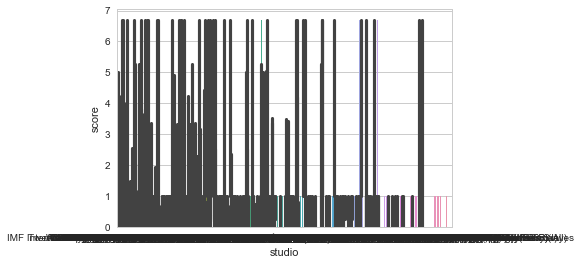

In [102]:
#sns.barplot(df.studio, df.score, data=df)

In [103]:
df[['country', 'score']].groupby(['country'], as_index=False).mean().sort_values(by='country', ascending=False)

,country,score
51,West Germany,0.750000
50,USA,0.602149
49,UK,0.885854
48,Thailand,1.000000
47,Taiwan,0.857143
46,Switzerland,1.000000
45,Sweden,1.217647
44,Spain,0.988000
43,Soviet Union,1.000000
42,South Korea,1.261111


In [104]:
df.columns

Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')

In [105]:
df['votes'].value_counts()

2594      3
10067     3
3464      3
4218      3
1711      3
1668      3
1240      3
2798      3
2702      3
2432      3
14685     3
1198      3
1036      3
5361      2
3005      2
13616     2
80396     2
3800      2
3102      2
39558     2
426       2
36713     2
682       2
2379      2
3573      2
3576      2
15491     2
13522     2
17234     2
7116      2
         ..
11607     1
13656     1
23897     1
11611     1
38236     1
105889    1
18387     1
19779     1
34727     1
21796     1
25906     1
64805     1
30055     1
19751     1
2340      1
73901     1
21804     1
25960     1
269617    1
456       1
5440      1
2218      1
81205     1
51155     1
513336    1
34106     1
33478     1
37097     1
925       1
58959     1
Name: votes, Length: 5775, dtype: int64

In [107]:
df['votes'].head()

0     958400
1     865551
2     470625
3    1069292
4    1845853
Name: votes, dtype: int64

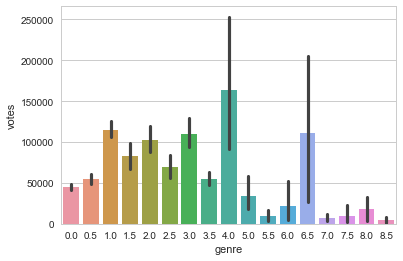

In [108]:
sns.barplot(df.genre, df.votes, data=df)

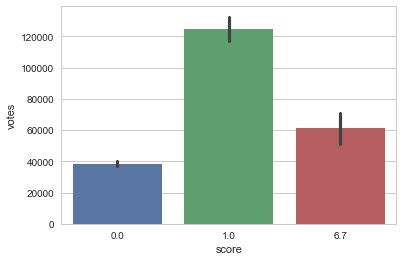

In [110]:
sns.barplot(df.score, df.votes, data=df)

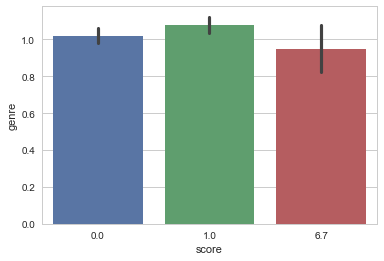

In [112]:
sns.barplot(df.score, df.genre, data=df)

In [116]:
df.votes.mean()

71885.36716666666

In [128]:
df.loc[df['votes']<71884, 'votes']=0
df.loc[df['votes']>71]

In [131]:
df

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,1.0,760507625.0,Avatar (2009),PG-13,162,1.0,Sam Worthington,Twentieth Century Fox Film Corporation,0
1,200000000.0,USA,James Cameron,0.5,658672302.0,Titanic (1997),PG-13,194,1.0,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,0
2,150000000.0,USA,Colin Trevorrow,1.0,652270625.0,Jurassic World (2015),PG-13,124,1.0,Chris Pratt,Universal Pictures,0
3,220000000.0,USA,Joss Whedon,1.0,623357910.0,The Avengers (2012),PG-13,143,1.0,Robert Downey Jr.,Marvel Studios,0
4,185000000.0,USA,Christopher Nolan,1.0,534858444.0,The Dark Knight (2008),PG-13,152,1.0,Christian Bale,Warner Bros.,0
5,200000000.0,USA,Gareth Edwards,1.0,532177324.0,Rogue One (2016),PG-13,133,1.0,Felicity Jones,Lucasfilm,0
6,115000000.0,USA,George Lucas,1.0,474544677.0,Star Wars: Episode I - The Phantom Menace (1999),PG,136,0.0,Ewan McGregor,Lucasfilm,0
7,250000000.0,USA,Joss Whedon,1.0,459005868.0,Avengers: Age of Ultron (2015),PG-13,141,1.0,Robert Downey Jr.,Marvel Studios,0
8,250000000.0,UK,Christopher Nolan,1.0,448139099.0,The Dark Knight Rises (2012),PG-13,164,1.0,Christian Bale,Warner Bros.,0
9,150000000.0,USA,Andrew Adamson,3.0,436471036.0,Shrek 2 (2004),PG,93,1.0,Mike Myers,DreamWorks,0


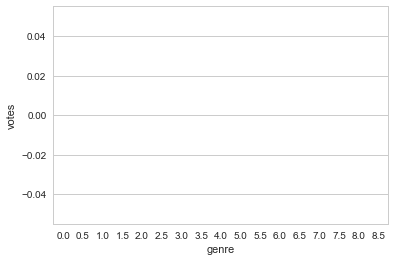

In [130]:
sns.barplot(df.genre, df.votes, data=df)